<a href="https://colab.research.google.com/github/purvanshgarg/simplilearn/blob/main/color_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

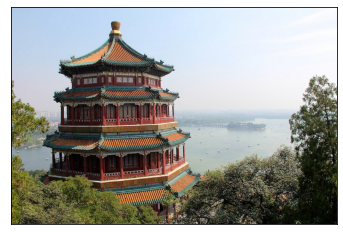

In [16]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
flower=load_sample_image('china.jpg')
ax=plt.axes(xticks=[],yticks=[])
ax.imshow(flower)


In [17]:
flower.shape

(427, 640, 3)

In [18]:
data=flower/255.0
data=data.reshape(427*640,3)
data.shape

(273280, 3)

In [19]:
import numpy as np
def plot_pixels(data,title,colors=None,N=10000):
  if colors is None:
    colors=data
  rng=np.random.RandomState(0)
  i=rng.permutation(data.shape[0])[:N]
  colors=colors[i]
  R,G,B=data[i].T
  fig,ax=plt.subplots(1,2,figsize=(16,6))
  ax[0].scatter(R,G,color=colors,marker='.')
  ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
  ax[1].scatter(R,B,color=colors,marker='.')
  ax[1].set(xlabel='Red',ylabel='Blue',xlim=(0,1),ylim=(0,1))
  fig.suptitle(title,size=20)

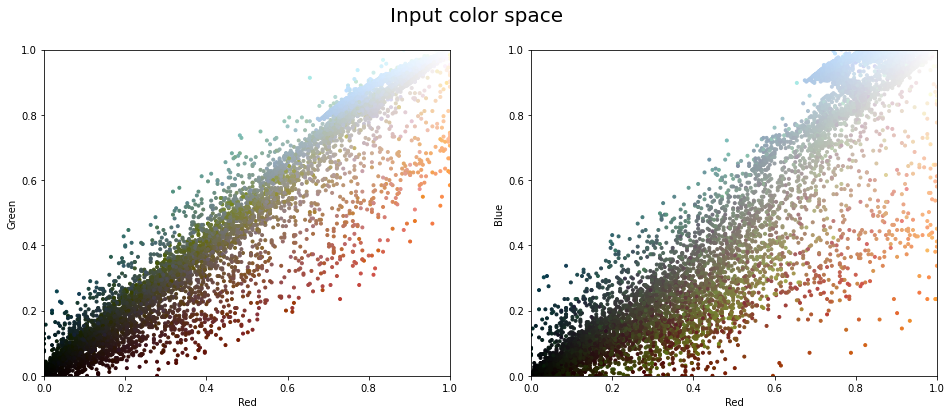

In [20]:
plot_pixels(data,title="Input color space")

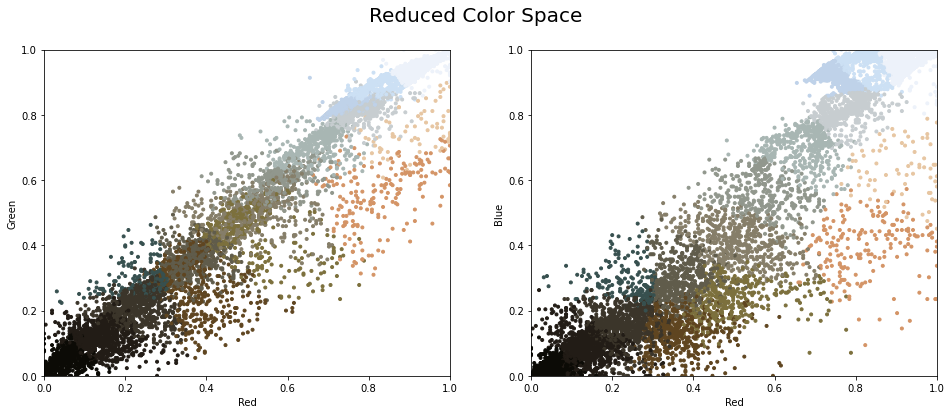

In [21]:
import warnings;warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
model=MiniBatchKMeans(16)
model.fit(data)
new_colors=model.cluster_centers_[model.predict(data)]
plot_pixels(data,colors=new_colors,title='Reduced Color Space')

Text(0.5, 1.0, 'Compressed Image')

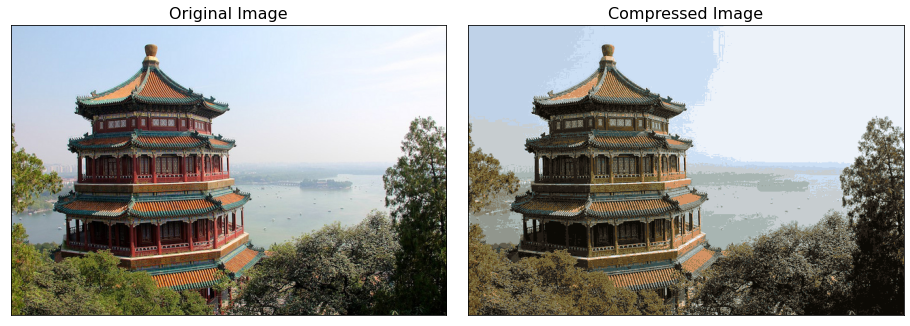

In [22]:
flower_recolored=new_colors.reshape(flower.shape)
fig,ax=plt.subplots(1,2,figsize=(16,6),subplot_kw=(dict(xticks=[],yticks=[])))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(flower)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(flower_recolored)
ax[1].set_title('Compressed Image',size=16)
